# 90 子集Ⅱ
输入：可能包含重复元素的整数数组nums  
输出：该数组所有可能的子集（子集之间互相不能重复）  

## 思路
78题中的nums里是不含有重复元素的，但本题中说明了数组中时可能包含重复元素的

所以求出的子集要去重

**去重之前先排序！树层和树枝分别去重！**

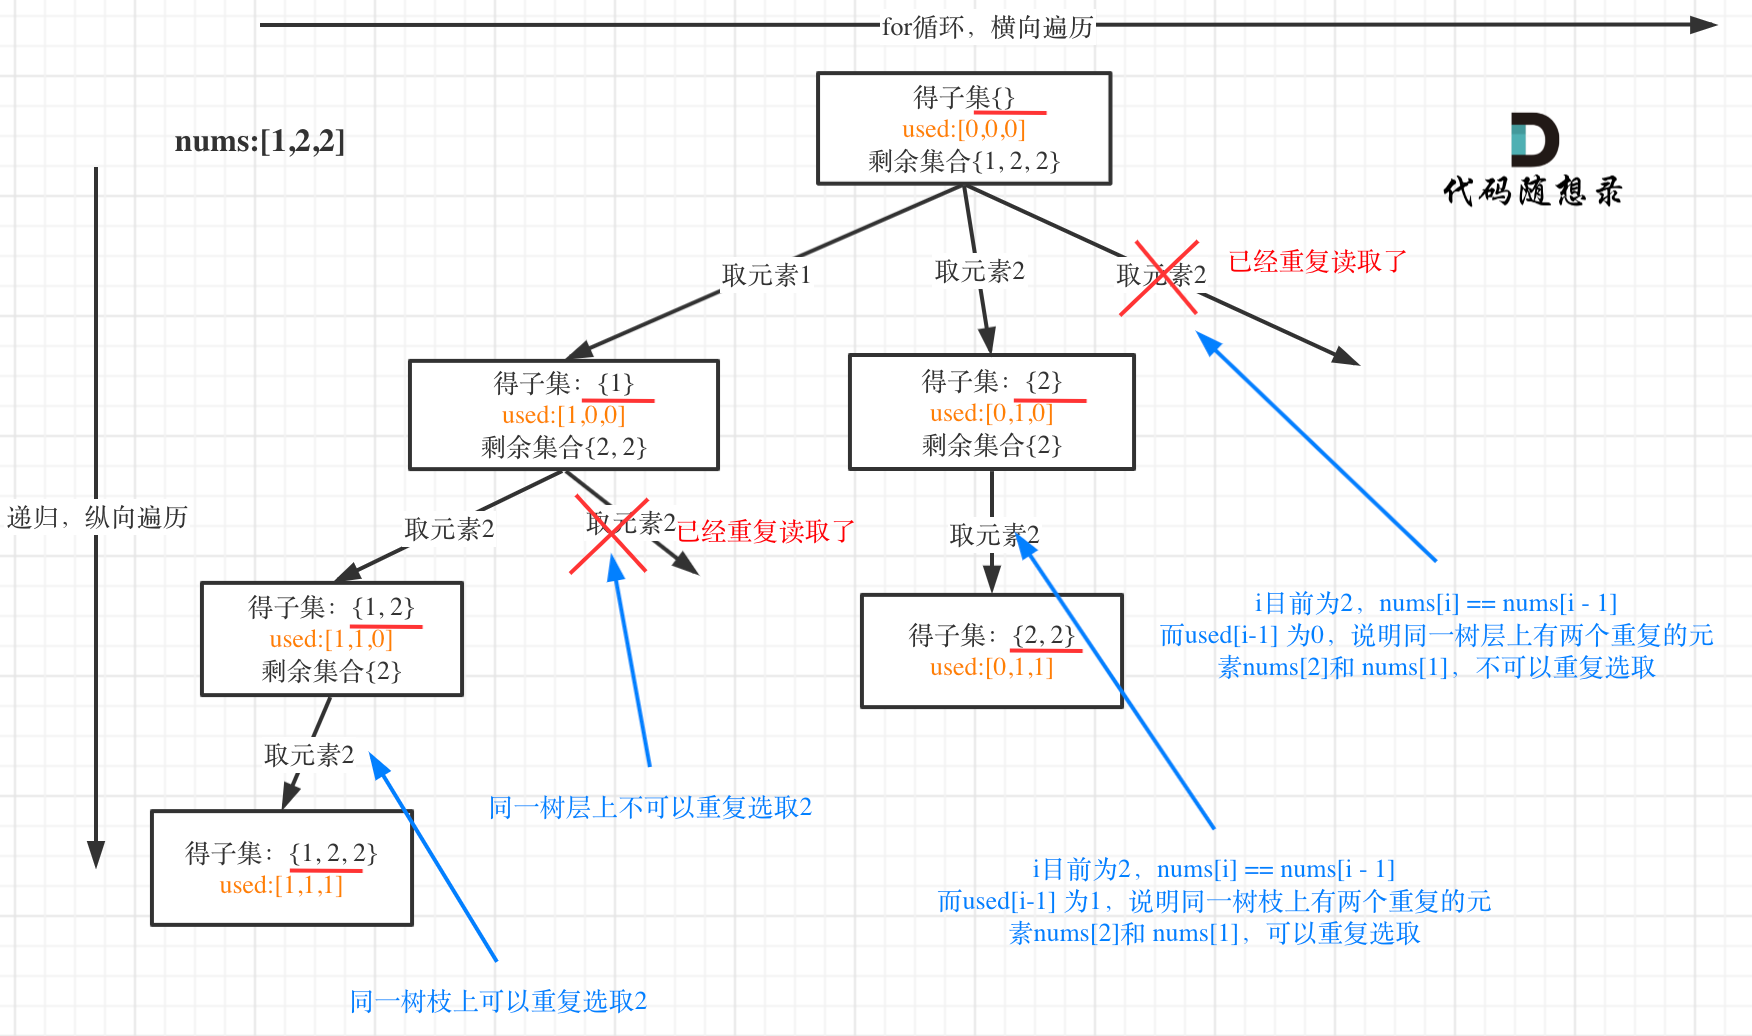

和之前去重的逻辑类似：  
- 同一树层上取数不可以重复
- 但同一树枝上是可以重复取的
- 在当前元素和上一个元素相同的情况下，上一个元素如果没有被使用过说明是树层重复，要去掉


In [2]:
# 使用used数组去重

class Solution:
    def subsetsWithDup(self, nums):
        result = []
        path = []
        used = [False] * len(nums)
        nums.sort()
        self.backtracing(nums, 0, used, path, result)
        return result
    
    def backtracing(self, nums, startIndex, used, path, result):
        result.append(path[:])   # 先收集子集，不然会漏
        for i in range(startIndex, len(nums)):
            if i > 0 and nums[i] == nums[i - 1] and not used[i - 1]:
                # print('i: ', i)
                # print(used)
                # print('nums[i], nums[i-1]: ',nums[i], nums[i-1])
                # 上一个没被用过才是树层重复需要去掉，直接跳过
                continue
            path.append(nums[i])   # 节点处理
            # print(path)
            used[i] = True
            self.backtracing(nums, i+1, used, path, result)  # 递归
            used[i] = False  # 回溯撤销
            path.pop()

solution = Solution()
nums = [1,3,3,4,3]
ans = solution.subsetsWithDup(nums)
print(ans)

[1]
[1, 3]
[1, 3, 3]
[1, 3, 3, 3]
[1, 3, 3, 3, 4]
[1, 3, 3, 4]
i:  3
[True, True, False, False, False]
nums[i], nums[i-1]:  3 3
[1, 3, 4]
i:  2
[True, False, False, False, False]
nums[i], nums[i-1]:  3 3
i:  3
[True, False, False, False, False]
nums[i], nums[i-1]:  3 3
[1, 4]
[3]
[3, 3]
[3, 3, 3]
[3, 3, 3, 4]
[3, 3, 4]
i:  3
[False, True, False, False, False]
nums[i], nums[i-1]:  3 3
[3, 4]
i:  2
[False, False, False, False, False]
nums[i], nums[i-1]:  3 3
i:  3
[False, False, False, False, False]
nums[i], nums[i-1]:  3 3
[4]
[[], [1], [1, 3], [1, 3, 3], [1, 3, 3, 3], [1, 3, 3, 3, 4], [1, 3, 3, 4], [1, 3, 4], [1, 4], [3], [3, 3], [3, 3, 3], [3, 3, 3, 4], [3, 3, 4], [3, 4], [4]]
